In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pythermalcomfort.models import set_tmp

# Data Preparation

In [6]:
# read csv file: 'Chinese Thermal Comfort Dataset Class II.csv'
df_rawdata = pd.read_csv('Chinese Thermal Comfort Dataset Class II.csv')

/var/folders/v0/03v41tbn7072cjr0b3ddfgjw0000gn/T/ipykernel_55229/3087830493.py:2: DtypeWarning: Columns (0,9,12,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rawdata = pd.read_csv('Chinese Thermal Comfort Dataset Class II.csv')


In [7]:
df_rawdata.columns = df_rawdata.iloc[0]  # Set the first row as the column names
df_rawdata = df_rawdata[1:].reset_index(drop=True)  # Remove the first row and reset the index

In [8]:
city_dict_lat = {
    "Liaoning Province,Dalian City": 38.91,
    "Heilongjiang Province, Harbin City": 45.75,
    "Guangdong Province,Heyuan City": 23.74,
    "Guangdong Province,Lianzhou City": 24.78,
    "Guangdong Province,Chaozhou City": 23.66,
    "Guangdong Province,Jieyang City": 23.54,
    "Guangdong Province,Guangzhou City": 23.12,
    "Guangdong Province,Shantou City": 23.35,
    "Guangdong Province,Qingyuan City": 23.68,
    "Guangdong Province,Dongguan City": 23.02,
    "Guangdong Province,Jiangmen City": 22.58,
    "Guangdong Province,Chaoyang City": 39.86,
    "Beijing City": 39.90,
    "Hunan Province, Changsha City": 28.22,
    "Hunan Province, Yueyang City": 29.35,
    "Shanghai City": 31.23,
    "Baotou City": 40.65, 
    "Guangxi Province Beihai City": 21.48,
    "Anhui Province,Hefei City": 31.86, 
    "Henan Province,Jiaozuo City": 35.22,
    "Sichuan Province, Kangding City": 30.05,
    "Jiangsu Province, Nanjing City": 32.06, 
    "Shaanxi Province, Xi'an City": 34.27,
    "Turpan": 42.95, 
    "Hainan Province, Sanya City": 18.25,
    "Hubei Province, Wuhan City": 30.59, 
    "Yunnan Province,Kunming City": 24.88,
    "Lhasa City": 29.65, 
    "Guangdong Province,Shenzhen City": 22.54, 
    "Tianjin City": 39.13
}
# create a new column 'latitude' and in df_rawdata and assign the latitude value to corresponding city
df_rawdata['latitude'] = df_rawdata['A5.City'].map(city_dict_lat)

In [14]:
df_rawdata.columns

Index(['ID', 'A1.Code', 'A2.Date', 'A3.Data Contributor', 'A4.Season',
       'A5.City', 'A6.Climate Zone', 'B1.Building Type',
       'B2.Building Function', 'B3.Floors', 'B4.Building Operation Mode',
       'B5.Room (Length��Width)', 'B5.Room Height (m)', 'C1.Sex', 'C2.Age',
       'C3.Height��cm��', 'C4.Weight��kg��', 'C5.Living Years', 'tsv', 'tcv',
       'tav', 'clo', 'met', 'Measured Height (m)', 't_db', 'rh', 'vel',
       't_globe', 'E5.Roof Temperature (��)', 'E5.Wall Temperature (��)',
       'E5.Floor Temperature (��)', 't_op', 't_mrt',
       'F3.Radiant Temperature Asymmetry (��)', 'F4.PMV', 'F5.PPD',
       't_out_realtime', 't_out_daily', 't_out_monthly',
       'G4.7-Day Running Mean Outdoor Temperature (��)',
       'G4.15-Day Running Mean Outdoor Temperature (��)',
       'G5.Mean Daily Outdoor Relative Humidity (%)',
       'G6.Mean Daily Outdoor Air Velocity (m/s)', 'latitude'],
      dtype='object', name=0)

In [13]:
# rename personal conditions
df_rawdata = df_rawdata.rename(columns={'D1.TSV': 'tsv'})
df_rawdata = df_rawdata.rename(columns={'D2.TCV': 'tcv'})
df_rawdata = df_rawdata.rename(columns={'D3.TAV': 'tav'})
df_rawdata = df_rawdata.rename(columns={'D5.Clothing Insulation (clo)': 'clo'})
df_rawdata = df_rawdata.rename(columns={'D6.Metabolic Rate (met)': 'met'})
# rename  indoor environment parameters
df_rawdata = df_rawdata.rename(columns={'E1.Indoor Air Temperature (��)': 't_db'})
df_rawdata = df_rawdata.rename(columns={'E2.Indoor Relative Humidity (%)': 'rh'})
df_rawdata = df_rawdata.rename(columns={'E3.Indoor Air Velocity (m/s)': 'vel'})
df_rawdata = df_rawdata.rename(columns={'E4.Globe Temperature (��)': 't_globe'})
df_rawdata = df_rawdata.rename(columns={'F1.Operative Temperature (��)': 't_op'})
df_rawdata = df_rawdata.rename(columns={'F2.Mean Radiant Temperature (��)': 't_mrt'})
# rename outdoor temperature parameters
df_rawdata = df_rawdata.rename(columns={'G1.Real-Time Outdoor Temperature (��)': 't_out_realtime'})
df_rawdata = df_rawdata.rename(columns={'G2.Mean Daily Outdoor Temperature (��)': 't_out_daily'})
df_rawdata = df_rawdata.rename(columns={'G3.Monthly Mean Outdoor Temperature (��)': 't_out_monthly'})

In [25]:
columns_to_check = ['t_db', 't_mrt', 'vel', 'rh', 'met', 'clo', 't_op', 'tsv']
for col in columns_to_check:
    if df_rawdata[col].isnull().any():
        print(f"Column {col} contains NaN values.")
    if not pd.api.types.is_numeric_dtype(df_rawdata[col]):
        print(f"Column {col} contains non-numeric data.")

In [24]:
# convert int or str to float
df_rawdata['t_db'] = df_rawdata['t_db'].astype(float)
df_rawdata['t_mrt'] = df_rawdata['t_mrt'].astype(float)
df_rawdata['vel'] = df_rawdata['vel'].astype(float)
df_rawdata['rh'] = df_rawdata['rh'].astype(float)
df_rawdata['met'] = df_rawdata['met'].astype(float)
df_rawdata['clo'] = df_rawdata['clo'].astype(float)
df_rawdata['t_op'] = df_rawdata['t_op'].astype(float)
df_rawdata['tsv'] = df_rawdata['tsv'].astype(float)

In [16]:
for column in columns_to_check:
    # Convert column to numeric, setting errors='coerce' will convert non-convertible values to NaN
    df_rawdata[column] = pd.to_numeric(df_rawdata[column], errors='coerce')

In [20]:
df_rawdata['t_set'] = df_rawdata.apply(lambda row: set_tmp(
    tdb=row['t_db'], 
    tr=row['t_mrt'], 
    v=row['vel'], 
    rh=row['rh'], 
    met=row['met'], 
    clo=row['clo']
), axis=1)

In [26]:
# create a new column nt_op
df_rawdata['G4_tn_op'] = df_rawdata['t_op'] + (0 - df_rawdata['tsv'])/4.0

In [33]:
# only select A4.Season = heating season
df_heating = df_rawdata[df_rawdata['A4.Season'] == 'Winter Season']

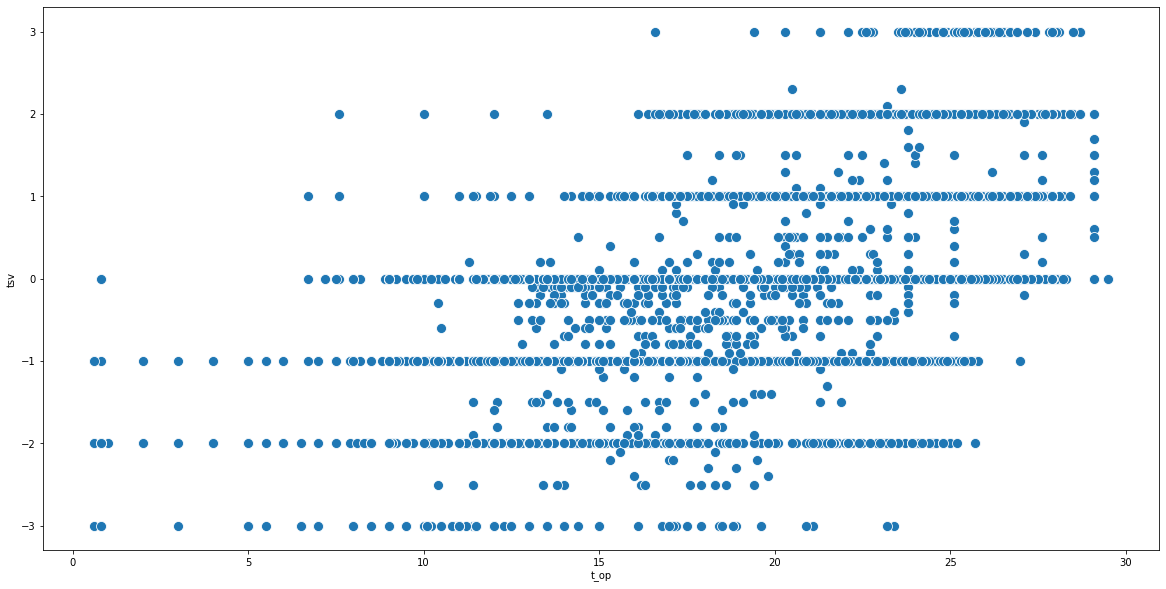

In [35]:
# scatter plot of t_out_monthly_yrmin as x and t_n as y, and show city name of each point
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_heating, x='t_op', y='tsv', s=100)
plt.show()